In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [5]:
df = pd.read_csv('nursery.data')

In [6]:
df

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [14]:
df = df.drop('recommend',axis = 1)

In [15]:
df.columns

Index(['usual', 'proper', 'complete', '1', 'convenient', 'convenient.1',
       'nonprob', 'recommended'],
      dtype='object')

In [16]:
labelencoder = LabelEncoder()
df['usual'] = labelencoder.fit_transform(df['usual'])
df['proper'] = labelencoder.fit_transform(df['proper'])
df['complete'] = labelencoder.fit_transform(df['complete'])
df['1'] = labelencoder.fit_transform(df['1'])
df['convenient'] = labelencoder.fit_transform(df['convenient'])
df['convenient.1'] = labelencoder.fit_transform(df['convenient.1'])
df['nonprob'] = labelencoder.fit_transform(df['nonprob'])
df['recommended'] = labelencoder.fit_transform(df['recommended'])

In [17]:
df

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
0,2,3,0,0,0,0,0,1
1,2,3,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2
3,2,3,0,0,0,0,2,1
4,2,3,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1
12955,0,4,2,3,1,1,2,0
12956,0,4,2,3,1,1,1,2
12957,0,4,2,3,1,1,1,1


<Axes: >

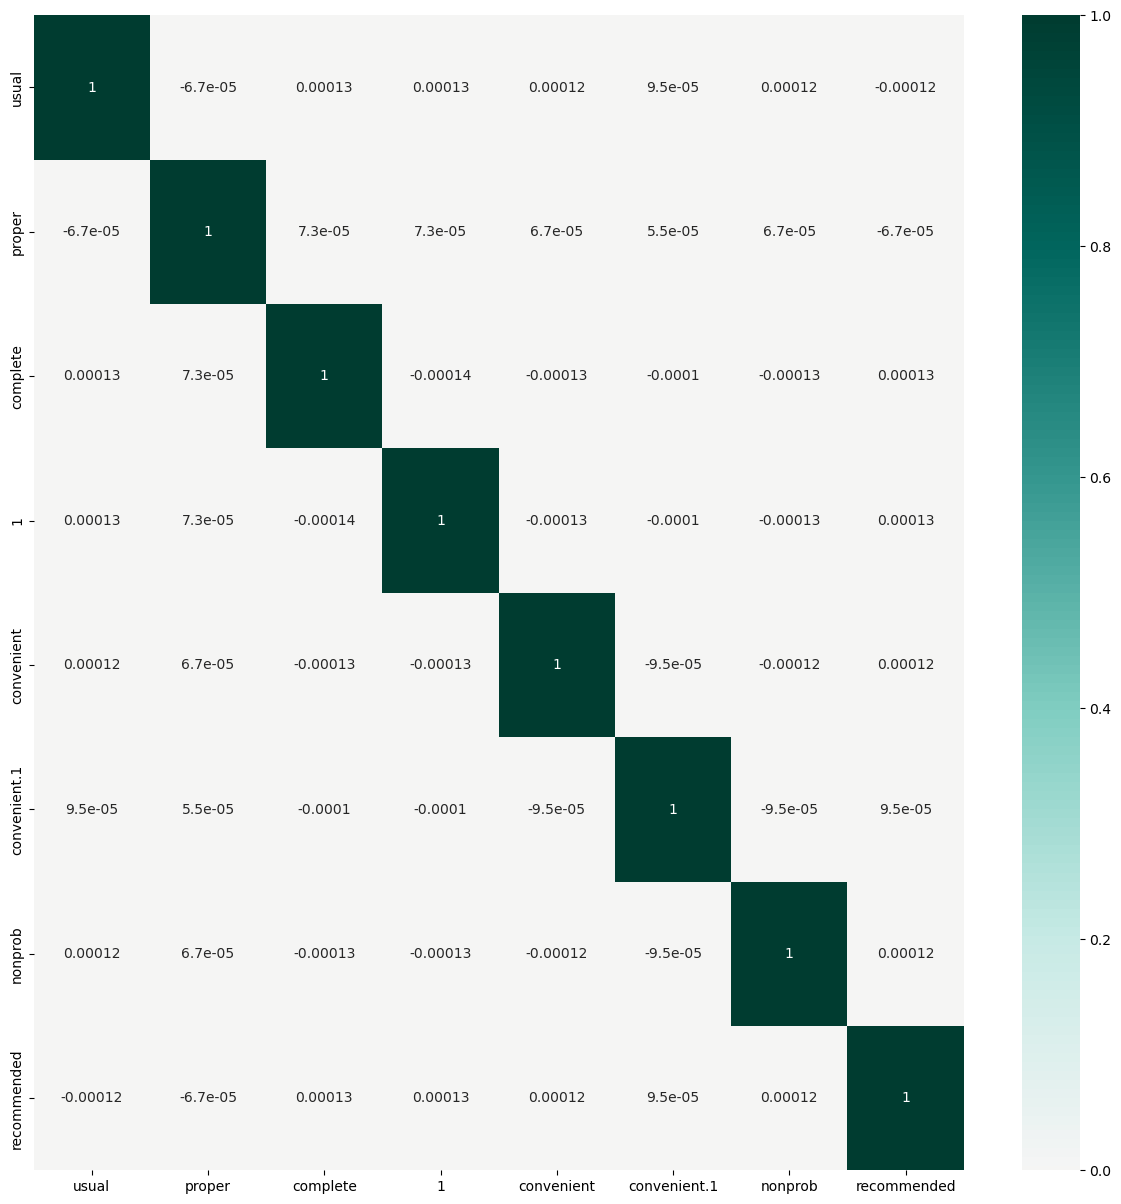

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

#Since the data was most categorical so they are not very much correlated

In [21]:
X = df.drop('recommended',axis = 1)

In [22]:
X

,usual,proper,complete,1,convenient,convenient.1,nonprob
0,2,3,0,0,0,0,0
1,2,3,0,0,0,0,0
2,2,3,0,0,0,0,2
3,2,3,0,0,0,0,2
4,2,3,0,0,0,0,2
...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2
12955,0,4,2,3,1,1,2
12956,0,4,2,3,1,1,1
12957,0,4,2,3,1,1,1


In [23]:
Y = df['recommended']

In [24]:
Y

0        1
1        0
2        2
3        1
4        0
        ..
12954    1
12955    0
12956    2
12957    1
12958    0
Name: recommended, Length: 12959, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

def Master(model, model_name):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acuracy = accuracy_score(y_test, y_pred)
    print(model_name, " : ", acuracy)


In [26]:
classifier = KNeighborsClassifier(n_neighbors = 5)

pipe = [('standard_Scaler',StandardScaler()),('classifier',classifier)]
pipe = Pipeline(pipe)

In [27]:
Master(pipe,'KNN')

KNN  :  0.10185185185185185


In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [29]:
cv =  GridSearchCV(classifier,param_grid,cv = 5)
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [30]:
y_pred =cv.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred)

0.16589506172839505

In [32]:
cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}